In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
print(cv.__version__)

4.5.4


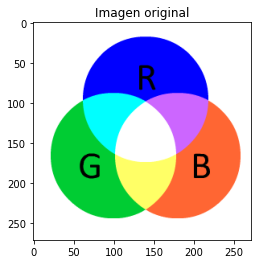

In [3]:
im = cv.imread('im/rgb.png')
plt.imshow(im)
plt.title("Imagen original")
plt.show()

Este primer intento no funciona muy bien

In [4]:
grayscale = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

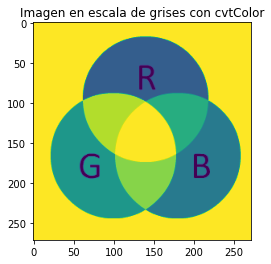

True

In [5]:
plt.imshow(grayscale)
plt.title("Imagen en escala de grises con cvtColor")
plt.show()
cv.imwrite('out/gs-cvt.png', grayscale)

Escala de grises con un solo canal B,G,R -> 0,1,2

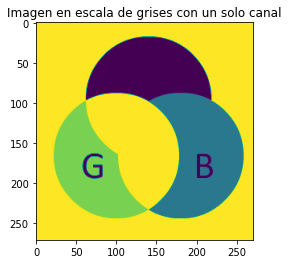

True

In [6]:
grayscale = im[:,:,1]
plt.imshow(grayscale)
plt.title("Imagen en escala de grises con un solo canal")
plt.show()
cv.imwrite('out/gs-1c.png', grayscale)

Promedios que pueden ser:
- Y= 0.114B + 0.587G + 0.299R
- Y= 0.33B + 0.33G + 0.33R

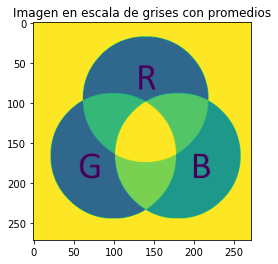

True

In [7]:
grayscale = 0.33*im[:,:,0] + 0.33*im[:,:,1] + 0.33*im[:,:,2]
grayscale = grayscale.astype(np.uint8)
plt.imshow(grayscale)
plt.title("Imagen en escala de grises con promedios")
plt.show()
cv.imwrite('out/gs-p.png', grayscale)

Filtro de mediana
https://github.com/MeteHanC/Python-Median-Filter/blob/master/MedianFilter.py

In [8]:
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    window = [
        (i, j)
        for i in range(-indexer, filter_size-indexer)
        for j in range(-indexer, filter_size-indexer)
    ]
    index = len(window) // 2
    for i in range(len(data)):
        for j in range(len(data[0])):
            data[i][j] = sorted(
                0 if (
                    min(i+a, j+b) < 0
                    or len(data) <= i+a
                    or len(data[0]) <= j+b
                ) else data[i+a][j+b]
                for a, b in window
            )[index]
    return data

import os
im_noise = plt.imread(os.path.join('im/dsc00006.jpg'))
im_filtered = median_filter(im_noise, 3)
plt.imshow(im_filtered)
plt.title("Imagen filtrada")
plt.show()
cv.imwrite('out/filtered.jpg', im_filtered)

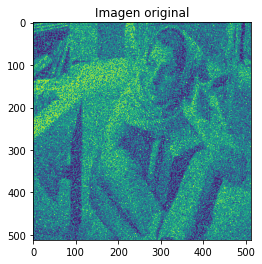

In [9]:
from PIL import Image

im_noise = Image.open("im/noisyimg.png").convert("L")
plt.imshow(im_noise)
plt.title("Imagen original")
plt.show()

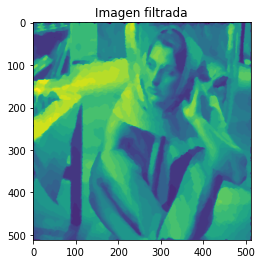

In [10]:
arr = np.array(im_noise)
removed_noise = median_filter(arr, 5) 
im_filtered = Image.fromarray(removed_noise)
plt.imshow(im_filtered)
plt.title("Imagen filtrada")
plt.show()
im_filtered = im_filtered.save("out/filtered.jpg")